In [1]:
import pandas as pd
import numpy as np

In [2]:
from collections import Counter

In [3]:
a_ch_dw = pd.read_csv('./magazine/final/a_ch_dw.csv', sep = '|', encoding = 'utf-8')
b_ch_dw = pd.read_csv('./magazine/final/b_ch_dw.csv', sep = '|', encoding = 'utf-8')
c_ch_dw = pd.read_csv('./magazine/final/c_ch_dw.csv', sep = '|', encoding = 'utf-8')
e_ch_dw = pd.read_csv('./magazine/final/e_ch_dw.csv', sep = '|', encoding = 'utf-8')
fb_ch_dw = pd.read_csv('./magazine/final/fb_ch_dw.csv', sep = '|', encoding = 'utf-8')
fn_ch_dw = pd.read_csv('./magazine/final/fn_ch_dw.csv', sep = '|', encoding = 'utf-8')
m_ch_dw = pd.read_csv('./magazine/final/m_ch_dw.csv', sep = '|', encoding = 'utf-8')
v_ch_dw = pd.read_csv('./magazine/final/v_ch_dw.csv', sep = '|', encoding = 'utf-8')
w_ch_dw = pd.read_csv('./magazine/final/w_ch_dw.csv', sep = '|', encoding = 'utf-8')

In [4]:
ch_dw = pd.concat([a_ch_dw, b_ch_dw, c_ch_dw, e_ch_dw, fb_ch_dw, fn_ch_dw, m_ch_dw, v_ch_dw, w_ch_dw])

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [141]:
ch_dw.reset_index(drop=True, inplace = True)

In [142]:
len(ch_dw)

1450

In [7]:
ch_dw = ch_dw[['magazine', 'brand', 'category', 'title', 'link', 'date', 'contents',
       'title_brand', 'check', 'why', 'word_chanel']]

In [8]:
for i in range(len(ch_dw)):
    if not '샤넬' in ch_dw.loc[i, 'contents']:
        ch_dw.loc[i, 'check'] = 2

In [9]:
def drop_2(df):
    return df[df['check'] != 2]

In [10]:
ch_dw = drop_2(ch_dw)

# 전처리

### 기호 삭제

In [91]:
ch_dw['word_chanel'] = ch_dw['word_chanel'].str.replace('[', '').str.replace(']', '').str.replace('\\', '').str.replace('"', '').str.replace("'", "").str.replace('「', '').str.replace('」', '').str.replace('”', '').str.replace('‘', '').str.replace('“', '')

## 브랜드 및 디자이너 이름 대체

### 에디 슬리먼, 에디 슬리만 -> 'HEDI-SLIMANE'으로 변경
에디슬리먼, 에디슬리만, 에디 슬리먼, 에디 슬리만

In [120]:
for word in ce_dw['word_celine']:
    if 'HEDI-SLIMANEe' in word:
        print(word)
        print('-'*50)

In [121]:
# ce_dw['word_celine'] = ce_dw['word_celine'].str.replace('에디슬리먼', '에디-슬리먼').str.replace('에디 슬리먼', '에디-슬리먼').str.replace('에디슬리만', '에디-슬리먼').str.replace('에디 슬리만', '에디-슬리먼')

In [122]:
# ce_dw['word_celine'] = ce_dw['word_celine'].str.replace('에디-슬리먼', 'HEDI-SLIMANE')

In [123]:
'Hedi Slimane'.upper()

'HEDI SLIMANE'

In [124]:
# ce_dw['word_celine'] = ce_dw['word_celine'].str.replace('Hedi Sliman', 'HEDI-SLIMANE')

In [125]:
# ce_dw['word_celine'] = ce_dw['word_celine'].str.replace('HediSlimane', 'HEDI-SLIMANE')

In [126]:
# ce_dw['word_celine'] = ce_dw['word_celine'].str.replace('HEDI-SLIMANEe', 'HEDI-SLIMANE')

### ce_dw 파일 저장 -> ce_dwr (drop, word-extracting, replace-word)

In [92]:
ch_dw.to_csv('./magazine/final/ch_dwr.csv', sep='|', encoding = 'utf-8', index = False)

In [93]:
ch_dwr = pd.read_csv('./magazine/final/ch_dwr.csv', sep='|', encoding = 'utf-8')

In [94]:
ch_dw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1450 entries, 0 to 1593
Data columns (total 12 columns):
magazine         1450 non-null object
brand            1450 non-null object
category         1450 non-null object
title            1450 non-null object
link             1450 non-null object
date             1450 non-null object
contents         1450 non-null object
title_brand      1450 non-null int64
check            1450 non-null int64
why              297 non-null object
word_chanel      1450 non-null object
sentences_tag    1450 non-null object
dtypes: int64(2), object(10)
memory usage: 147.3+ KB


In [95]:
ch_dwr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 12 columns):
magazine         1450 non-null object
brand            1450 non-null object
category         1450 non-null object
title            1450 non-null object
link             1450 non-null object
date             1450 non-null object
contents         1450 non-null object
title_brand      1450 non-null int64
check            1450 non-null int64
why              297 non-null object
word_chanel      1450 non-null object
sentences_tag    1450 non-null object
dtypes: int64(2), object(10)
memory usage: 136.0+ KB


## list 생성 후 append

In [96]:
contents_list = []

In [97]:
len(ch_dw)

1450

In [98]:
# ce_dw['word_celine']

In [99]:
magazine_list = []
article_list = []
for word in ch_dw['word_chanel']:
    article_list.append(word)

In [100]:
len(article_list)

1450

In [101]:
article_list[120]

'  (왼쪽) 트위드 재킷과 하이톱 스니커즈는 가격미정, 샤넬(Chanel). 가죽 팬츠는 1백98만원, 이자벨 마랑 에뚜왈(Isabel Marant Etoile). 격자무늬 셔츠는 6만9천원, 브라바도(Bravado). 티셔츠는 12만5천원, 엠에스지엠 바이 아이한스타일닷컴(MSGM by ihanstyle.com). (오른쪽) 트위드 재킷은 가격미정, 샤넬. 프릴 장식 실버 스커트는 49만9천원, 엘리든 스튜디오 바이 오프닝 세레모니(Eliden Studio by Opening Ceremony). 웨스턴 스타일 부츠는 1백99만원, 펜디.'

### 기호 삭제

In [102]:
# import re

# for article in article_list:
#     article_list2 = re.sub('[^\w\s]', '', article)

# # article_list[100].replace(' \', '')

## Twitter

In [103]:
from konlpy.tag import Twitter

In [104]:
twitter = Twitter()


/home/lab11/.local/lib/python3.5/site-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


### 각 문장별로 형태소 구분하기

In [105]:
sentences_tag = []

for sentence in article_list:
    morph = twitter.pos(sentence)
    sentences_tag.append(morph)
    
    

print(len(sentences_tag))


1450


In [106]:
sentences_tag[0]

[('메탈', 'Noun'),
 ('과', 'Josa'),
 ('레진', 'Noun'),
 ('으로', 'Josa'),
 ('만든', 'Verb'),
 ('귀고리', 'Noun'),
 ('는', 'Josa'),
 ('가격', 'Noun'),
 ('미정', 'Noun'),
 (',', 'Punctuation'),
 ('샤넬', 'Noun'),
 ('(', 'Punctuation'),
 ('Chanel', 'Alpha'),
 (').', 'Punctuation')]

In [107]:
ch_dw['sentences_tag'] = sentences_tag 

In [143]:
ch_dw

,magazine,brand,category,title,link,date,contents,title_brand,check,why,word_chanel,sentences_tag
0,A,Ch,FASHION,"가을 트렌드 컬러, 위대한 블랙의 위로",http://www.allurekorea.com/2020/11/15/%ea%b0%8...,2020-11-15,"['미니멀리즘과 맥시멀리즘 사이 그 어디쯤. 위대한 블랙이 주는 찬란한 위로.', ...",0,0,-,"메탈과 레진으로 만든 귀고리는 가격미정, 샤넬(Chanel).","[(메탈, Noun), (과, Josa), (레진, Noun), (으로, Josa)..."
1,A,Ch,FASHION,빈티지 쇼핑의 시대,http://www.allurekorea.com/2020/10/27/%eb%b9%8...,2020-10-27,"['20년이 지난 패션템에 새로운 활기가 돈다. 바야흐로 빈티지 쇼핑의 시대다.',...",0,0,-,"당장 인스타그램을 열어 패션 에디터, 디자이너, 인플루언서의 계정을 열어보길. 지금...","[(당장, Noun), (인스타그램, Noun), (을, Josa), (열어, Ve..."
2,A,Ch,FASHION,"올가을 시즌의 주인공, 체인의 활약",http://www.allurekorea.com/2020/10/18/%ec%98%a...,2020-10-18,"['주인공이 된 체인의 대활약, 이번 시즌 그 쓰임은 실로 전방위적이다.', ' ...",0,0,-,체인과 진주의 결합으로 우아함을 배가한 샤넬의 액세서리들.,"[(체인, Noun), (과, Josa), (진주, Noun), (의, Josa),..."
3,A,Ch,FASHION,"주식을 시작한 패션 에디터의 이야기, 나는 주주다",http://www.allurekorea.com/2020/10/16/%ec%a3%b...,2020-10-16,['주식의 ‘주’자도 모르는 패션 에디터가 주식에 눈뜨려 하는 순간. 이번 시즌 가...,0,0,-,"생각해보자. 나와 주변 친구들이 좋아하고 사고 싶은, 그리고 익숙한 브랜드가 뭐가 ...","[(생각, Noun), (해보자, Verb), (., Punctuation), (나..."
4,A,Ch,FASHION,가을의 그림자만큼 길어진 롱부츠 12가지,http://www.allurekorea.com/2020/10/02/%ea%b0%8...,2020-10-02,"['종아리를 살짝 덮는 미들 부츠부터, 무릎 길이의 니하이 부츠, 허벅지까지 올라오...",0,0,-,"컬러블록이 조화로운 부츠는 가격미정, 샤넬(Chanel). 와인색 니하이 부츠는...","[(컬러, Noun), (블록, Noun), (이, Josa), (조화로운, Adj..."
5,A,Ch,FASHION,ESFP에게 어울리는 운동화는? MBTI 성향 별 어울리는 백과 슈즈 추천 리스트 [3],http://www.allurekorea.com/2020/09/16/esfp%ec%...,2020-09-16,"['나에게 어울리는 백과 슈즈는 무엇일까? 2020 가을/겨울 시즌, MBTI 성향...",0,0,-,사교적인 ENFJ 타입. 주변의 모든 사람과 친구로 지내고 그들과의 추억이 중요한 ...,"[(사교, Noun), (적, Suffix), (인, Josa), (ENFJ, Al..."
6,A,Ch,FASHION,ESFP에게 어울리는 운동화는? MBTI 성향 별 어울리는 백과 슈즈 추천 리스트 [1],http://www.allurekorea.com/2020/09/15/esfp%ec%...,2020-09-15,"['나에게 어울리는 백과 슈즈는 무엇일까? 2020 가을/겨울 시즌, MBTI 성향...",0,0,-,인생의 실용적인 부분이나 논리 대신 나름의 원칙을 가지고 행동하는 INFP. 게으르...,"[(인생, Noun), (의, Josa), (실용, Noun), (적, Suffix..."
7,A,Ch,FASHION,1940년대가 돌아온다! 올해는 동전지갑을 주목할 것!,http://www.allurekorea.com/2020/09/11/1940%eb%...,2020-09-11,"['1970년대의 화려함, 90년대의 익숙함을 지나 40년대의 고풍스러움에 안착했다...",0,0,-,"복주머니 형상의 체인 백은 가격미정, 샤넬(Chanel).","[(복, Noun), (주머니, Noun), (형상, Noun), (의, Josa)..."
8,A,Ch,FASHION,가을에 어울리는 색을 딱 하나 고르면? 카멜색!,http://www.allurekorea.com/2020/09/01/%ea%b0%8...,2020-09-01,"['가을을 기다리게 하는 색. 캐멀빛의 다채로운 모습.', ' 1990’S CLE...",0,0,-,"빈티지한 체크무늬 재킷은 가격미정, 셀린느(Celine). 비비드한 핑크 컬러 셔츠...","[(빈티, Noun), (지, Josa), (한, Determiner), (체크, ..."
9,A,Ch,FASHION,나도 셀프 웨딩 해볼까? 1,http://www.allurekorea.com/2020/08/11/%eb%82%9...,2020-08-11,['개성 있는 결혼식과 특별한 추억을 원하는 요즘 신부들. 이들의 셀프 웨딩과 촬영...,0,0,-,"스티치 디테일 코튼 원피스는 19만8천원, 로우 클래식(Low Classic). 헤...","[(스티치, Noun), (디테일, Noun), (코튼, Noun), (원피스, N..."


In [135]:
ch_dw.to_csv('./magazine/final/ch_tag.csv', sep = '|', encoding = 'utf-8', index = False)

In [109]:
twitter.tagset

{'Adjective': '형용사',
 'Adverb': '부사',
 'Alpha': '알파벳',
 'Conjunction': '접속사',
 'Determiner': '관형사',
 'Eomi': '어미',
 'Exclamation': '감탄사',
 'Foreign': '외국어, 한자 및 기타기호',
 'Hashtag': '트위터 해쉬태그',
 'Josa': '조사',
 'KoreanParticle': '(ex: ㅋㅋ)',
 'Noun': '명사',
 'Number': '숫자',
 'PreEomi': '선어말어미',
 'Punctuation': '구두점',
 'ScreenName': '트위터 아이디',
 'Suffix': '접미사',
 'Unknown': '미등록어',
 'Verb': '동사'}

### stop_words 추가

In [110]:
# from nltk.corpus import stopwords 
# from nltk.tokenize import word_tokenize 

In [111]:
sw_df = pd.read_csv('stopwords.csv', header=None)

In [112]:
sw_df.columns = ['stopword']

In [113]:
stop_words = []
for sw in sw_df['stopword']:
    stop_words.append(sw)

In [114]:
print(len(stop_words))
print(type(stop_words))

675
<class 'list'>


In [115]:
stop_words[-10:]

['둘', '셋', '넷', '다섯', '여섯', '일곱', '여덟', '아홉', '령', '영']

In [116]:
add_0 = ['있', '위하', '가격미정', '미정', '가격', '지나', '선보이', '이번', '특히', '통하', '역시', '때문', '않', '알리', '주목', '대하', '한편', '사실', '당시', '그것', '지금', '사람' ]
for w in add_0:
    stop_words.append(w)

In [117]:
add_1 = ['위하', '선보이', '가격', '가격 미정', '미정', '지금', 'BY', 'N', '있', '없', '지나', '만들', '말하', '입', '보', '되','선보이', '같', '대하', '등장']
for w in add_1:
    stop_words.append(w)

In [118]:
stop_words[0]

'아'

In [119]:
len(stop_words)

717

### 1. 'Adjective': '형용사', 'Determiner': '관형사', 'Foreign': '외국어, 한자 및 기타기호', 'Noun': '명사' 품사만 선별해 리스트에 담기

In [161]:
ADFN_list= []
for sentence1 in sentences_tag:
    words = []
    for word, tag in sentence1:
        if tag in ['Adjective', 'Determiner','Foreign','Noun']:
            if word not in stop_words:
                words.append(word)
    ADFN_list.append(words)

In [162]:
len(ADFN_list)

1450

In [167]:
ch_dw['ADFN'] = ADFN_list

In [163]:
ADFN_df = pd.DataFrame({
    'article':article_list,
    'noun':ADFN_list
})

In [127]:
ADFN_list[-10:]

['사항', '최근', '베트멍', '마놀', '블라닉', '협업', '하이', '부츠', '매력', '있다고']

### 선별된 품사별 빈도수 계산 & 상위 빈도 10위까지 출력

In [123]:
word_list = Counter(ADFN_list)
print(word_list.most_common(100))

[('샤넬', 5205), ('컬렉션', 1556), ('패션', 1186), ('수', 1147), ('칼', 958), ('브랜드', 921), ('펠트', 878), ('라거', 864), ('있는', 850), ('쇼', 734), ('모델', 716), ('장식', 702), ('백', 659), ('그녀', 640), ('드레스', 634), ('소재', 632), ('파리', 531), ('여성', 508), ('위', 505), ('말', 502), ('가브리엘', 499), ('스타일', 495), ('룩', 490), ('트', 488), ('컬러', 482), ('제품', 474), ('가장', 466), ('디자이너', 454), ('블랙', 441), ('더', 436), ('재킷', 428), ('디자인', 426), ('지난', 419), ('시즌', 416), ('주얼리', 409), ('코코', 403), ('위드', 380), ('새로운', 379), ('같은', 378), ('하우스', 370), ('전', 364), ('아이템', 364), ('세계', 354), ('비', 353), ('화이트', 350), ('사진', 342), ('위해', 340), ('방', 339), ('매치', 330), ('시작', 325), ('모든', 321), ('옷', 318), ('통해', 311), ('럭셔리', 310), ('다양한', 308), ('크루즈', 306), ('모습', 302), ('영감', 290), ('아르', 288), ('중', 284), ('영화', 281), ('개', 278), ('스타', 277), ('듯', 277), ('디렉터', 274), ('드', 270), ('프랑스', 268), ('매력', 261), ('슈즈', 255), ('스커트', 254), ('골드', 253), ('생각', 248), ('연출', 246), ('링', 242), ('가죽', 241), ('팬츠', 240), ('내',

In [124]:
# 한 글자인 단어는 제외

for i, v in enumerate(ADFN_list):
    if len(v)<2:
        ADFN_list.pop(i)

In [125]:
count = Counter(ADFN_list)

In [126]:
word_list = count.most_common(200)
# for v in word_list:
#     print(v)
word_list

[('샤넬', 5205),
 ('컬렉션', 1556),
 ('패션', 1186),
 ('브랜드', 921),
 ('펠트', 878),
 ('라거', 864),
 ('있는', 850),
 ('모델', 716),
 ('장식', 702),
 ('그녀', 640),
 ('드레스', 634),
 ('소재', 632),
 ('파리', 531),
 ('여성', 508),
 ('가브리엘', 499),
 ('스타일', 495),
 ('컬러', 482),
 ('제품', 474),
 ('가장', 466),
 ('디자이너', 454),
 ('블랙', 441),
 ('재킷', 428),
 ('디자인', 426),
 ('지난', 419),
 ('시즌', 416),
 ('주얼리', 409),
 ('코코', 403),
 ('위드', 380),
 ('새로운', 379),
 ('같은', 378),
 ('하우스', 370),
 ('아이템', 364),
 ('세계', 354),
 ('화이트', 350),
 ('사진', 342),
 ('위해', 340),
 ('매치', 330),
 ('시작', 325),
 ('모든', 321),
 ('통해', 311),
 ('럭셔리', 310),
 ('다양한', 308),
 ('크루즈', 306),
 ('모습', 302),
 ('영감', 290),
 ('아르', 288),
 ('영화', 281),
 ('스타', 277),
 ('디렉터', 274),
 ('프랑스', 268),
 ('매력', 261),
 ('슈즈', 255),
 ('스커트', 254),
 ('골드', 253),
 ('생각', 248),
 ('연출', 246),
 ('가죽', 241),
 ('팬츠', 240),
 ('디올', 238),
 ('패션쇼', 234),
 ('버지', 234),
 ('가방', 231),
 ('슈트', 230),
 ('완성', 230),
 ('구찌', 228),
 ('런웨이', 225),
 ('클래식', 223),
 ('착용', 220),
 ('여름', 220),
 ('대한', 

### 2. 'Foreign': '외국어, 한자 및 기타기호', 'Noun': '명사' 품사만 선별해 리스트에 담기

In [128]:
noun= []
for sentence1 in sentences_tag:
    for word, tag in sentence1:
        if word not in stop_words:
            if tag in ['Foreign', 'Noun']:
                noun.append(word)

In [69]:
for i, v in enumerate(noun):
    if len(v)<2:
        noun.pop(i)

In [129]:
counts = Counter(noun)

In [131]:
noun_rank = counts.most_common(200)
noun_rank

[('샤넬', 5205),
 ('컬렉션', 1556),
 ('패션', 1186),
 ('수', 1147),
 ('칼', 958),
 ('브랜드', 921),
 ('펠트', 878),
 ('라거', 864),
 ('쇼', 734),
 ('모델', 716),
 ('장식', 702),
 ('백', 659),
 ('그녀', 640),
 ('드레스', 634),
 ('소재', 632),
 ('파리', 531),
 ('여성', 508),
 ('위', 505),
 ('말', 502),
 ('가브리엘', 499),
 ('스타일', 495),
 ('룩', 490),
 ('트', 488),
 ('컬러', 482),
 ('제품', 474),
 ('가장', 466),
 ('디자이너', 454),
 ('블랙', 441),
 ('더', 436),
 ('재킷', 428),
 ('디자인', 426),
 ('지난', 419),
 ('시즌', 416),
 ('주얼리', 409),
 ('코코', 403),
 ('위드', 380),
 ('하우스', 370),
 ('전', 364),
 ('아이템', 364),
 ('세계', 354),
 ('비', 353),
 ('화이트', 350),
 ('사진', 342),
 ('위해', 340),
 ('방', 339),
 ('매치', 330),
 ('시작', 325),
 ('모든', 321),
 ('옷', 318),
 ('통해', 311),
 ('럭셔리', 310),
 ('크루즈', 306),
 ('모습', 302),
 ('영감', 290),
 ('아르', 288),
 ('중', 284),
 ('영화', 281),
 ('개', 278),
 ('스타', 277),
 ('듯', 277),
 ('디렉터', 274),
 ('드', 270),
 ('프랑스', 268),
 ('매력', 261),
 ('슈즈', 255),
 ('스커트', 254),
 ('골드', 253),
 ('생각', 248),
 ('연출', 246),
 ('링', 242),
 ('가죽', 241),
 (

### 3. 명사만 선별해 아티클 별로 리스트에 담기

In [144]:
noun_article= []
for sentence1 in sentences_tag:
    art_noun = []
    for word, tag in sentence1:
        if word not in stop_words:
            if tag in ['Noun', 'Foreign']:
                art_noun.append(word)
    noun_article.append(art_noun)

print(len(noun_article))

1450


In [145]:
len(article_list)

1450

In [146]:
noun_df = pd.DataFrame({
    'article':article_list,
    'noun':noun_article
})

In [168]:
noun_df.head()

,article,noun
0,"메탈과 레진으로 만든 귀고리는 가격미정, 샤넬(Chanel).","[메탈, 레진, 귀고리, 샤넬]"
1,"당장 인스타그램을 열어 패션 에디터, 디자이너, 인플루언서의 계정을 열어보길. 지금...","[인스타그램, 패션, 에디터, 디자이너, 인, 플루, 계정, 막, 시작, 가을, 겨..."
2,체인과 진주의 결합으로 우아함을 배가한 샤넬의 액세서리들.,"[체인, 진주, 결합, 샤넬, 액세서리]"
3,"생각해보자. 나와 주변 친구들이 좋아하고 사고 싶은, 그리고 익숙한 브랜드가 뭐가 ...","[생각, 주변, 친구, 사고, 브랜드, 뭐, 샤넬, 에르메스, 루이, 비통, 디올,..."
4,"컬러블록이 조화로운 부츠는 가격미정, 샤넬(Chanel). 와인색 니하이 부츠는...","[컬러, 블록, 부츠, 샤넬, 와인, 색, 하이, 부츠, 셀린느, 구조, 형태, 굽..."


In [169]:
ch_dw['Noun_Forien'] = noun_article

In [170]:
ch_dw.to_csv('magazine/final/ch_tag_Twitter.csv', sep = '|', index = False, encoding = 'utf-8')

In [148]:
noun_df.to_csv('magazine/final/noun_chanel_Twitter.csv', sep = '|', index = False, encoding = 'utf-8')

In [156]:
noun_df.loc[1, 'noun']

['인스타그램',
 '패션',
 '에디터',
 '디자이너',
 '인',
 '플루',
 '계정',
 '막',
 '시작',
 '가을',
 '겨울',
 '상품',
 '족',
 '은',
 '가방',
 '액세서리',
 '심심',
 '치',
 '패션',
 '콘텐츠',
 '플랫폼',
 '앞',
 '빈티',
 '스타',
 '일링',
 '아아',
 '컬렉션',
 '한정판',
 '모델',
 '어쩌면',
 '패션계',
 '인물',
 '일지',
 '개인',
 '움',
 '옷',
 '액세서리',
 '처음',
 '함',
 '샤넬',
 '클래식',
 '백',
 '대해',
 '생각',
 '백인',
 '내',
 '보기',
 '한창때',
 '한결',
 '여사',
 '보이',
 '데님',
 '팬츠',
 '스웨터',
 '룩',
 '방울',
 '드라마',
 '하이에나',
 '변호사',
 '역',
 '김혜수',
 '빈티',
 '가방',
 '여럿',
 '처음',
 '빳빳함',
 '중력',
 '에르메스',
 '에르',
 '더',
 '샤넬',
 '브리프케이스',
 '소품',
 '경력',
 '능력',
 '정금',
 '역할',
 '리얼리티',
 '부여',
 '만',
 '처',
 '박아',
 '박스',
 '루이',
 '비통',
 '팩',
 '몽수리',
 '이름',
 '팩',
 '포코',
 '노',
 '소재',
 '프라다',
 '팩',
 '후계',
 '팩',
 '한쪽',
 '압구정동',
 '팩',
 '여성',
 '대여섯',
 '명',
 '만날',
 '수',
 '만에',
 '세상',
 '빛',
 '팩',
 '스웨터',
 '팩',
 '팩',
 '건',
 '이제',
 '빈티',
 '몽',
 '수리',
 '팩',
 '샤넬',
 '가브리엘',
 '팩',
 '디자인',
 '변형',
 '기존',
 '디자인',
 '레어템',
 '빈티',
 '패션',
 '어쩌면',
 '일이',
 '사랑',
 '사랑',
 '물건',
 '사랑',
 '일이',
 '요즘',
 '빈티',
 '물건',
 '대해',
 '중고',
 '임',
 '뜻',
 '

### 명사빈도 카운트

In [151]:
noun_list = counts.most_common(200)
for v in noun_list:
    print(v)

('샤넬', 5205)
('컬렉션', 1556)
('패션', 1186)
('수', 1147)
('칼', 958)
('브랜드', 921)
('펠트', 878)
('라거', 864)
('쇼', 734)
('모델', 716)
('장식', 702)
('백', 659)
('그녀', 640)
('드레스', 634)
('소재', 632)
('파리', 531)
('여성', 508)
('위', 505)
('말', 502)
('가브리엘', 499)
('스타일', 495)
('룩', 490)
('트', 488)
('컬러', 482)
('제품', 474)
('가장', 466)
('디자이너', 454)
('블랙', 441)
('더', 436)
('재킷', 428)
('디자인', 426)
('지난', 419)
('시즌', 416)
('주얼리', 409)
('코코', 403)
('위드', 380)
('하우스', 370)
('전', 364)
('아이템', 364)
('세계', 354)
('비', 353)
('화이트', 350)
('사진', 342)
('위해', 340)
('방', 339)
('매치', 330)
('시작', 325)
('모든', 321)
('옷', 318)
('통해', 311)
('럭셔리', 310)
('크루즈', 306)
('모습', 302)
('영감', 290)
('아르', 288)
('중', 284)
('영화', 281)
('개', 278)
('스타', 277)
('듯', 277)
('디렉터', 274)
('드', 270)
('프랑스', 268)
('매력', 261)
('슈즈', 255)
('스커트', 254)
('골드', 253)
('생각', 248)
('연출', 246)
('링', 242)
('가죽', 241)
('팬츠', 240)
('디올', 238)
('패션쇼', 234)
('버지', 234)
('건', 232)
('가방', 231)
('슈트', 230)
('완성', 230)
('구찌', 228)
('런웨이', 225)
('클래식', 223)
('착용', 220

## 워드클라우드 만들기

In [157]:
import matplotlib.pyplot as plt

### 패키지 및 폰트 설치

In [159]:
import matplotlib.font_manager as fm

# # 이용 가능한 폰트 중 '고딕'만 선별
# for font in fm.fontManager.ttflist:
#     if 'Gothic' in font.name:
#         print(font.name, font.fname)

In [158]:
font_path = 'C:\WINDOWS\Fonts\malgun.ttf'

### wordcloud 그리기

In [160]:
from wordcloud import WordCloud

ImportError: No module named 'wordcloud'

In [85]:
wc = WordCloud(font_path=font_path, background_color="white", width=600, height=400)

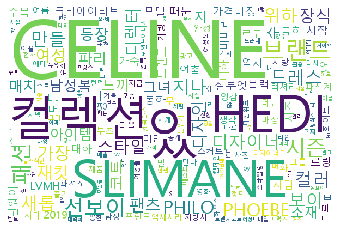

In [86]:
wc.generate_from_frequencies(dict(word_list))

plt.imshow(wc) 
plt.axis('off') 
plt.show()


wc.to_file('hannanum_adj_noun_celine.png')

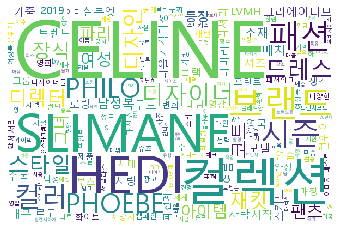

In [87]:
wc.generate_from_frequencies(dict(noun_list))

plt.imshow(wc) 
plt.axis('off') 
plt.show()

wc.to_file('hannanum_noun_celine.png')